In [1]:
import math
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

(Text(0.5, 1.0, 'Original Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

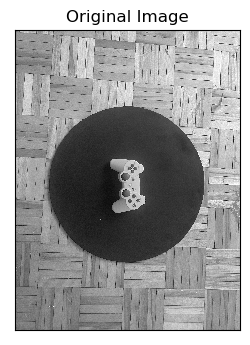

In [2]:
image_path1 = r'/home/instructor/Documents/OpenCV/cAPSTONE/Tests/ps_black.jpg'
image = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])


In [4]:


def find_circles_with_perimeter(image_path, inward_offset=10):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    assert img is not None, "File could not be read, check with os.path.exists()"
    img = cv2.medianBlur(img, 5)
    cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=30, minRadius=0, maxRadius=0)
    circles = np.uint16(np.around(circles))
    circle_parameters = []
    for i in circles[0,:1]:
        x, y, r = i[0], i[1], i[2]
        # Calculate inward offset
        offset = int(inward_offset / math.sqrt(2))
        # Adjust radius with inward offset
        r -= offset
        # Draw inner circle
        cv2.circle(cimg, (x, y), r, (255, 0, 0), 2)
        # Calculate perimeter
        perimeter = 2 * math.pi * r
        # Add circle parameters to the list
        circle_parameters.append((x, y, r, perimeter))
    return cimg, circle_parameters

def save_image_with_circles_and_perimeter(image_path, inward_offset=10):
    cimg, circle_parameters = find_circles_with_perimeter(image_path, inward_offset)
    return circle_parameters

if __name__ == "__main__":
    image_path = 'ps_black.jpg'
    
    circle_parameters = save_image_with_circles_and_perimeter(image_path, inward_offset=20)
    print("Circles detected:")

    # Load the original image
    original_image = cv2.imread(image_path)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Plot the original image with circles and perimeters
    plt.imshow(original_image_rgb)
    
    # Now you can use circle_parameters for further processing
    for x, y, r, perimeter in circle_parameters:
        circle = plt.Circle((x, y), r, color='red', fill=False)
        plt.gca().add_artist(circle)
        inner_circle = plt.Circle((x, y), r - 10, color='blue', fill=False)
        plt.gca().add_artist(inner_circle)

    plt.title('Detected Circles with Perimeters')
    plt.axis('off')
    plt.show()

        


KeyboardInterrupt: 